In [2]:
# T
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,Sequential
import matplotlib.pyplot as plt
import numpy as np

2023-08-12 11:52:41.678186: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_train[9]

array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]

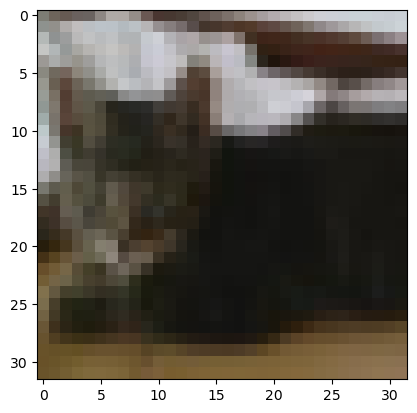

In [9]:
plt.imshow(X_train[9])

In [13]:
y_train[:2]

array([[6],
       [9]], dtype=uint8)

In [10]:
y_train=y_train.reshape(-1,)
y_train[:7]

array([6, 9, 9, 4, 1, 1, 2], dtype=uint8)

In [12]:
classes=['airplane','automobile','bird','cat','dear','dog','frog','horse','ship','truck']

In [18]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

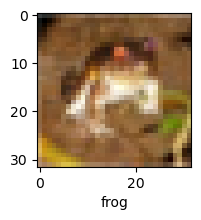

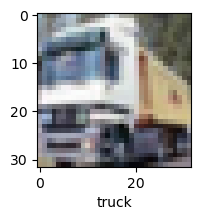

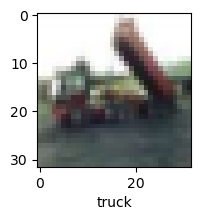

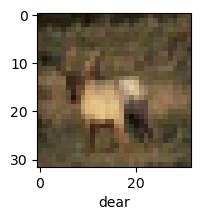

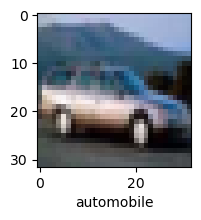

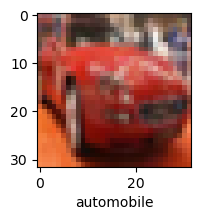

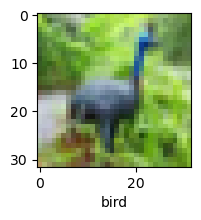

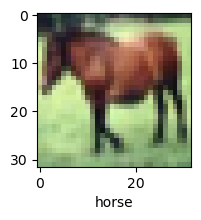

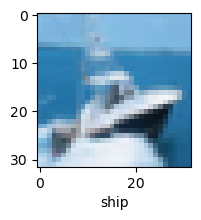

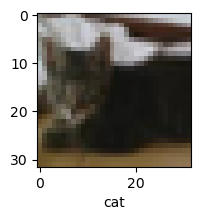

In [20]:
for i in range(10):
    plot_sample(X_train,y_train,i)

In [23]:
X_train=X_train/255
X_test=X_test/255

In [26]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [27]:
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [29]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.8159 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 124s 79ms/step - loss: 1.6269 - accuracy: 0.4249
Epoch 3/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.5401 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4814 - accuracy: 0.4770
Epoch 5/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4311 - accuracy: 0.4956


In [30]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 1.5007 - accuracy: 0.4669


[1.500686764717102, 0.4668999910354614]

In [31]:
from sklearn .metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

313/313 [==============================] - 6s 20ms/step


In [32]:
print('Classification Report: \n',classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.63      0.52      1000
           1       0.43      0.76      0.55      1000
           2       0.33      0.48      0.39      1000
           3       0.41      0.28      0.33      1000
           4       0.46      0.32      0.38      1000
           5       0.51      0.24      0.33      1000
           6       0.56      0.49      0.52      1000
           7       0.67      0.40      0.50      1000
           8       0.55      0.64      0.59      1000
           9       0.51      0.43      0.46      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [44]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

In [46]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [48]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.4612 - accuracy: 0.4777
Epoch 2/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.1067 - accuracy: 0.6140
Epoch 3/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.9753 - accuracy: 0.6609
Epoch 4/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.8878 - accuracy: 0.6931
Epoch 5/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.8160 - accuracy: 0.7203
Epoch 6/10
1563/1563 [==============================] - 135s 86ms/step - loss: 0.7560 - accuracy: 0.7383
Epoch 7/10
1563/1563 [==============================] - 126s 80ms/step - loss: 0.7035 - accuracy: 0.7570
Epoch 8/10
1563/1563 [==============================] - 119s 76ms/step - loss: 0.6574 - accuracy: 0.7709
Epoch 9/10
1563/1563 [==============================] - 124s 79ms/step - loss: 0.6098 - accuracy: 0.7875
Epoch 10/10
1563/1563 [==============================] 

In [49]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 9s 30ms/step - loss: 0.9407 - accuracy: 0.7020


[0.9406609535217285, 0.7020000219345093]

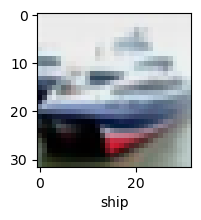

In [50]:
y_test=y_test.reshape(-1,)
plot_sample(X_test,y_test,1)

In [52]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 11s 35ms/step


array([[1.91545609e-04, 2.41249509e-05, 1.59842384e-04, 8.88635993e-01,
        7.29140535e-04, 1.72024593e-02, 9.28424597e-02, 9.80389959e-05,
        1.07307780e-04, 9.11638563e-06],
       [1.11483067e-04, 3.06812320e-02, 4.81306266e-08, 1.50707646e-09,
        5.27218130e-11, 8.22995838e-12, 2.11262171e-11, 9.43325930e-13,
        9.69200850e-01, 6.29695251e-06],
       [5.80245294e-02, 7.31512383e-02, 1.03536050e-03, 1.64366956e-03,
        3.84524647e-05, 4.68386395e-04, 1.64782632e-05, 3.86831729e-04,
        8.60509932e-01, 4.72507905e-03],
       [9.73327756e-01, 2.63839378e-03, 8.66669056e-04, 7.22724828e-04,
        2.23712661e-04, 4.25293820e-06, 5.30449461e-06, 2.13785097e-06,
        2.21026260e-02, 1.06360785e-04],
       [4.10119469e-07, 8.72174496e-06, 3.47907934e-03, 6.54134667e-03,
        9.38974440e-01, 8.54337050e-05, 5.09046465e-02, 5.27839484e-06,
        6.82512791e-07, 1.63305405e-08]], dtype=float32)

In [58]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes

[3,
 8,
 8,
 0,
 4,
 6,
 3,
 2,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 6,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 4,
 6,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 3,
 7,
 0,
 9,
 5,
 4,
 6,
 5,
 2,
 0,
 9,
 3,
 7,
 7,
 4,
 9,
 8,
 7,
 3,
 8,
 8,
 7,
 8,
 5,
 2,
 7,
 5,
 6,
 3,
 6,
 2,
 1,
 0,
 5,
 7,
 0,
 6,
 8,
 8,
 9,
 2,
 2,
 3,
 5,
 8,
 8,
 9,
 1,
 7,
 2,
 7,
 3,
 8,
 9,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 4,
 0,
 0,
 3,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 2,
 2,
 1,
 3,
 0,
 4,
 6,
 5,
 8,
 7,
 1,
 2,
 8,
 0,
 8,
 3,
 3,
 0,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 3,
 5,
 6,
 5,
 8,
 7,
 6,
 6,
 3,
 5,
 8,
 1,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 0,
 1,
 5,
 6,
 0,
 4,
 8,
 6,
 5,
 0,
 9,
 0,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 9,
 0,
 5,
 2,
 2,
 5,
 8,
 6,
 3,
 7,
 8,
 5,
 8,
 0,
 1,
 7,
 4,
 8,
 8,
 5,
 8,
 3,
 0,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 9,
 5,
 7,
 0,
 0,
 0,
 9,
 8,
 2,
 7,
 4,
 9,
 5,
 4,
 9,
 9,
 0,
 3,
 6,
 5,
 1,
 3,
 8,
 8,
 0,
 4,
 7,
 5,
 5,
 1,
 1,
 1,
 9,
 0,
 2,
 1,
 8,
 2,
 0,


In [59]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

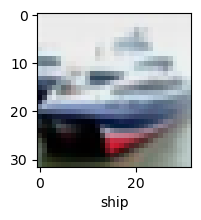

In [60]:
plot_sample(X_test,y_test,1)

In [61]:
classes[y_classes[1]]

'ship'

In [62]:
print('Classification Report: \n',classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.81      0.72      1000
           1       0.81      0.83      0.82      1000
           2       0.62      0.57      0.59      1000
           3       0.57      0.47      0.51      1000
           4       0.66      0.64      0.65      1000
           5       0.61      0.62      0.61      1000
           6       0.81      0.74      0.78      1000
           7       0.69      0.80      0.74      1000
           8       0.78      0.81      0.79      1000
           9       0.82      0.73      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

